In [ ]:
#1. Import and Preprocess Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv(r'C:/Databases/housing.csv')  

print(df.head())
print(df.info())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [ ]:
print(df.isnull().sum())

df = df.dropna()

X_simple = df[['area']]  
y = df['price']            

X_multi = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]  

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
#2. Split data into train-test sets.

X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y, test_size=0.2, random_state=42
)

In [ ]:
#3. Fit a Linear Regression model using sklearn.linear_model.

model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train_simple)


model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)


LinearRegression()

In [15]:
#4. Evaluate model using MAE, MSE, R².

y_pred_simple = model_simple.predict(X_test_simple)
y_pred_multi = model_multi.predict(X_test_multi)

print("Simple Linear Regression:")
print(f"Coefficient: {model_simple.coef_[0]:.2f}")
print(f"Intercept: {model_simple.intercept_:.2f}")
print(f"MAE: {mean_absolute_error(y_test_simple, y_pred_simple):.2f}")
print(f"MSE: {mean_squared_error(y_test_simple, y_pred_simple):.2f}")
print(f"R²: {r2_score(y_test_simple, y_pred_simple):.2f}")

print("\nMultiple Linear Regression:")
print(f"Coefficients: {model_multi.coef_}")
print(f"Intercept: {model_multi.intercept_:.2f}")
print(f"MAE: {mean_absolute_error(y_test_multi, y_pred_multi):.2f}")
print(f"MSE: {mean_squared_error(y_test_multi, y_pred_multi):.2f}")
print(f"R²: {r2_score(y_test_multi, y_pred_multi):.2f}")


Simple Linear Regression:
Coefficient: 425.73
Intercept: 2512254.26
MAE: 1474748.13
MSE: 3675286604768.19
R²: 0.27

Multiple Linear Regression:
Coefficients: [3.08866956e+02 1.51246751e+05 1.18573171e+06 4.95100763e+05
 3.37660830e+05]
Intercept: 51999.68
MAE: 1127483.35
MSE: 2292721545725.36
R²: 0.55


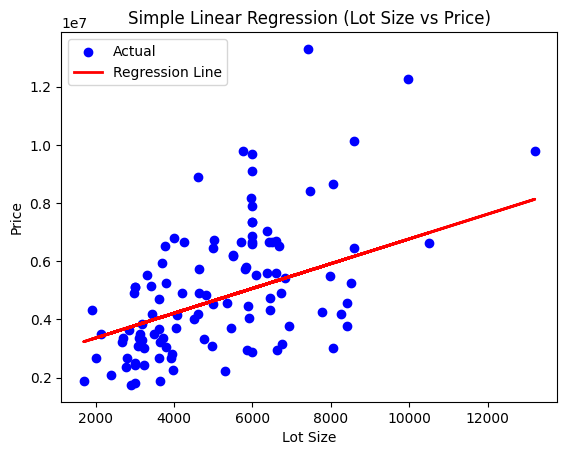

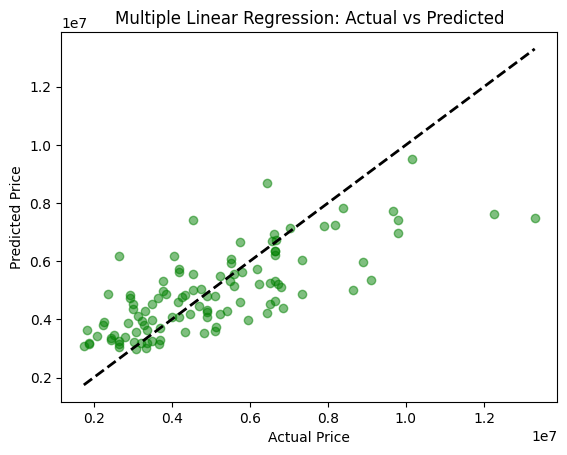


Simple Linear Regression Coefficient (slope): 425.72984193878284
Simple Linear Regression Intercept: 2512254.2639593435

Multiple Linear Regression Coefficients:
            Coefficient
area       3.088670e+02
bedrooms   1.512468e+05
bathrooms  1.185732e+06
stories    4.951008e+05
parking    3.376608e+05


In [17]:
#5.Plot regression line and interpret coefficients.

plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Simple Linear Regression (Lot Size vs Price)')
plt.legend()
plt.show()

plt.scatter(y_test_multi, y_pred_multi, color='green', alpha=0.5)
plt.plot([y_test_multi.min(), y_test_multi.max()], [y_test_multi.min(), y_test_multi.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.show()


print("\nSimple Linear Regression Coefficient (slope):", model_simple.coef_[0])
print("Simple Linear Regression Intercept:", model_simple.intercept_)

print("\nMultiple Linear Regression Coefficients:")
coefficients = pd.DataFrame(model_multi.coef_, X_multi.columns, columns=['Coefficient'])
print(coefficients)